# IOVISION-Assignment for the Artificial Intelligence 

In [77]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras
import seaborn as sns
from keras.layers import Dense, Dropout, GRU ,LSTM
from keras.models import Sequential
from keras import regularizers

In [51]:
df=pd.read_excel(r'C:\Users\hedi\Downloads\Assignment\data.xlsx')

In [52]:
%matplotlib inline

# cleaning data

In [53]:
df.isnull().sum()

ID              0
Gender          0
Nationality     0
Major           0
Level           0
IE1             0
SMSK3           0
RAS1            0
RAS2            0
SMSK1           0
SMSK4           0
IE2             0
TL1             0
RAS3            0
IE3             0
RAS4            0
RAS5            0
IE4             0
SMSK2           0
TL2             0
TL3             0
PSD1            0
PSD2            0
PSD3            0
IE5             0
PSD4            0
PSD5            0
IM1             0
IM2             0
IM3             0
IM4             0
IM5             0
IM6             0
W1             19
W2             14
W3             50
Employed        2
Score           0
Class           0
dtype: int64

In [54]:
df['W1'].fillna(value=df['W1'].mean(), inplace=True)
df['W2'].fillna(value=df['W2'].mean(), inplace=True)
df['W3'].fillna(value=df['W3'].mean(), inplace=True)
df['Employed'].fillna(value=df['Employed'].mean(), inplace=True)

In [55]:
df.describe()

,ID,Gender,Nationality,Major,Level,IE1,SMSK3,RAS1,RAS2,SMSK1,...,IM3,IM4,IM5,IM6,W1,W2,W3,Employed,Score,Class
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,130.500000,0.400000,0.303846,0.453846,1.973077,3.523077,3.226923,3.476923,3.542308,3.073077,...,3.557692,3.426923,3.376923,3.265385,3.344398,3.394309,2.566667,0.848837,3.510577,0.488462
std,75.199734,0.490843,0.460804,0.498825,0.442926,0.592298,0.744637,0.654245,0.629195,0.851099,...,0.652097,0.728916,0.768747,0.807036,0.820620,0.772980,1.027736,0.357515,0.452017,0.500831
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,65.750000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,3.430000,0.000000
50%,130.500000,0.000000,0.000000,0.000000,2.000000,4.000000,3.000000,4.000000,4.000000,3.000000,...,4.000000,4.000000,4.000000,3.000000,3.344398,4.000000,2.566667,1.000000,3.510000,0.000000
75%,195.250000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,3.710000,1.000000
max,260.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 39 columns):
ID             260 non-null int64
Gender         260 non-null int64
Nationality    260 non-null int64
Major          260 non-null int64
Level          260 non-null int64
IE1            260 non-null int64
SMSK3          260 non-null int64
RAS1           260 non-null int64
RAS2           260 non-null int64
SMSK1          260 non-null int64
SMSK4          260 non-null int64
IE2            260 non-null int64
TL1            260 non-null int64
RAS3           260 non-null int64
IE3            260 non-null int64
RAS4           260 non-null int64
RAS5           260 non-null int64
IE4            260 non-null int64
SMSK2          260 non-null int64
TL2            260 non-null int64
TL3            260 non-null int64
PSD1           260 non-null int64
PSD2           260 non-null int64
PSD3           260 non-null int64
IE5            260 non-null int64
PSD4           260 non-null int64
PSD5       

# data visualisation

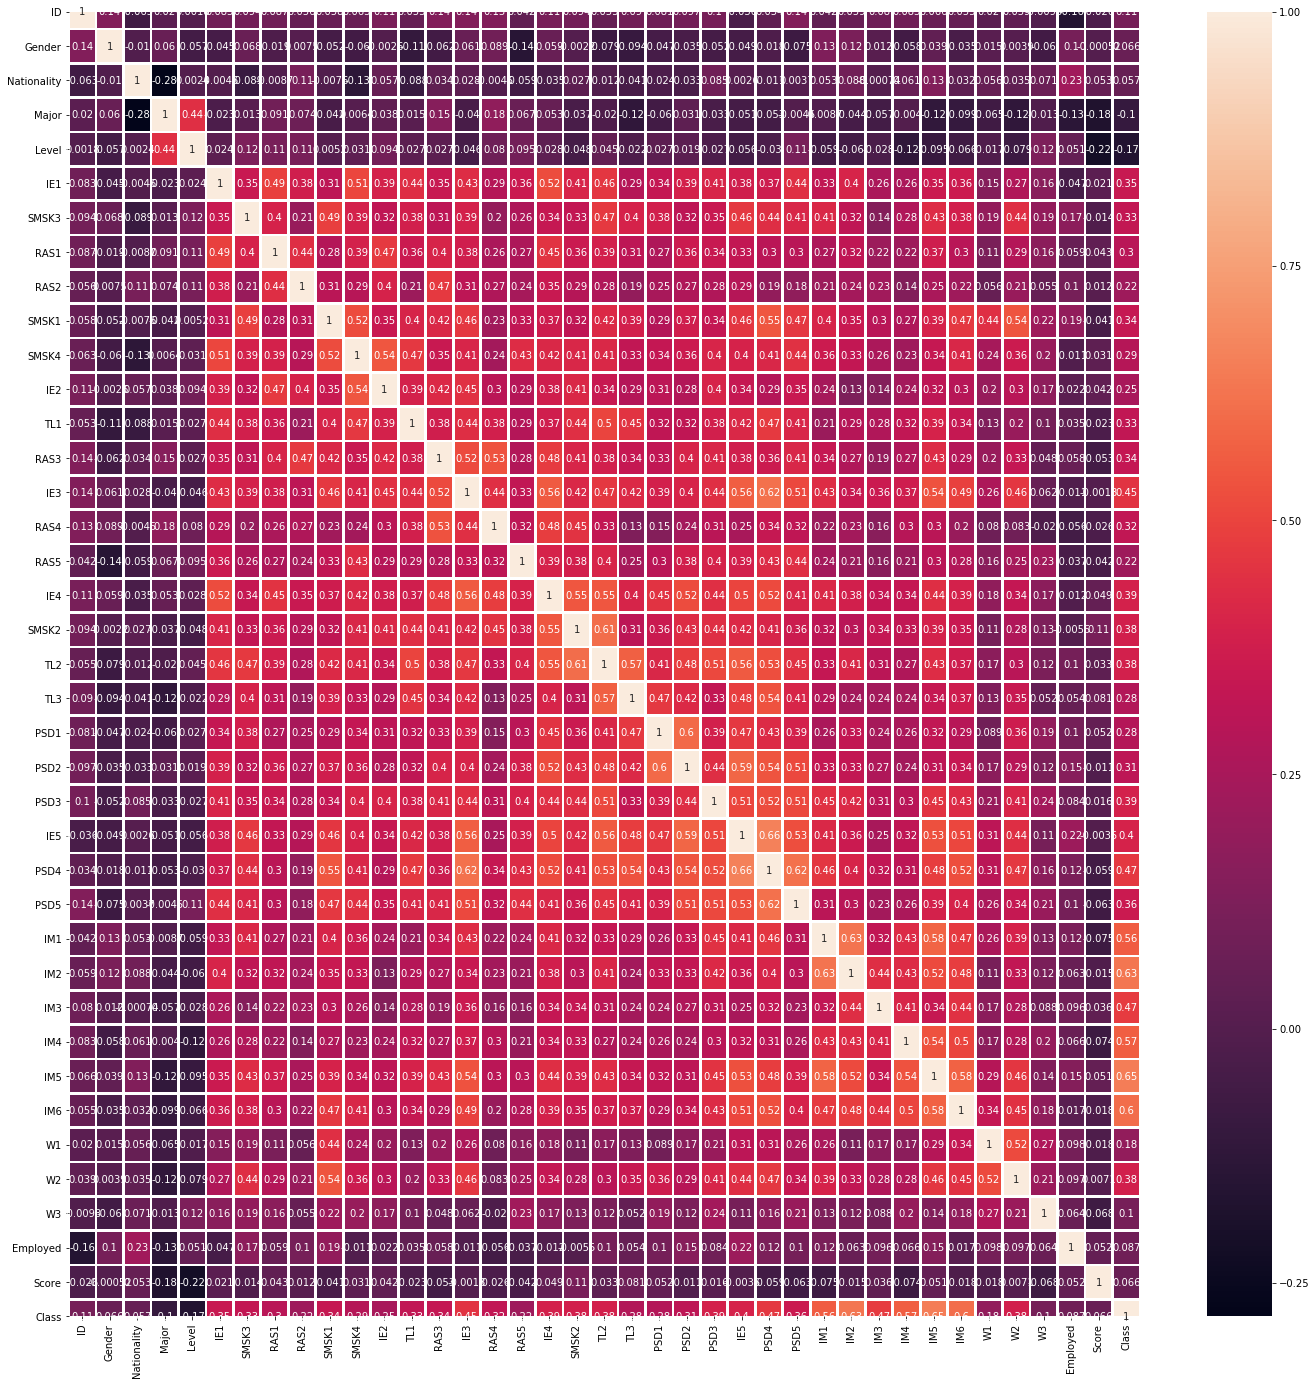

In [56]:
fi , ax = plt.subplots(figsize=(24,24))
sns.heatmap(df.corr(),annot=True , linewidths=1.8, ax=ax)

C:\Users\hedi\.conda\envs\factory619\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



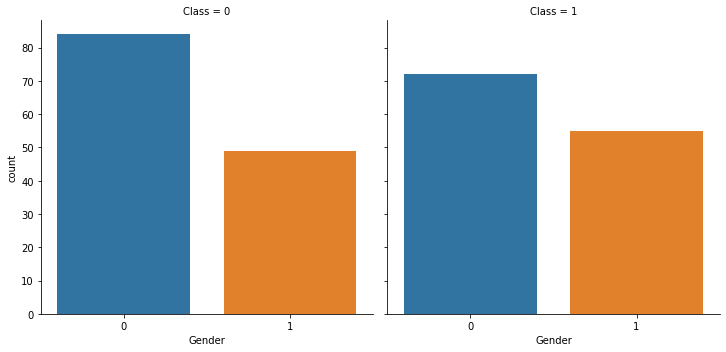

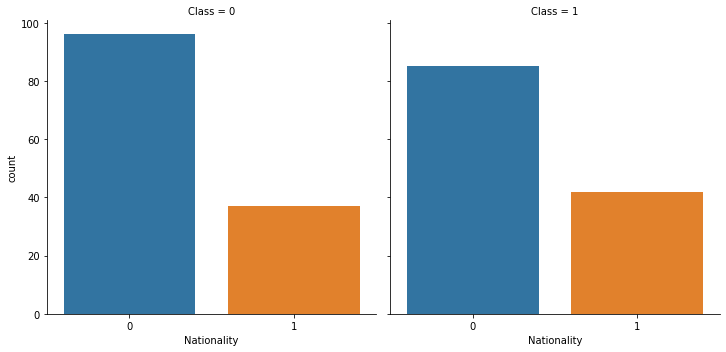

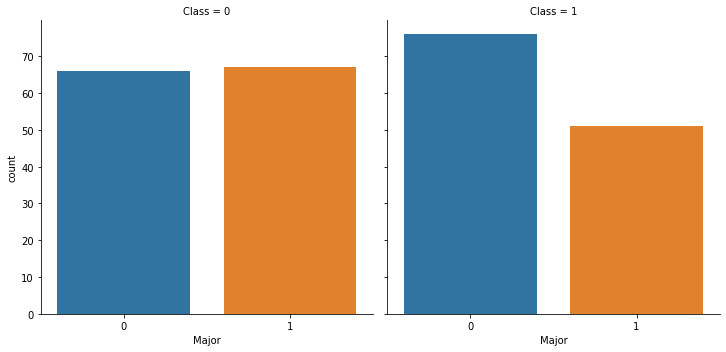

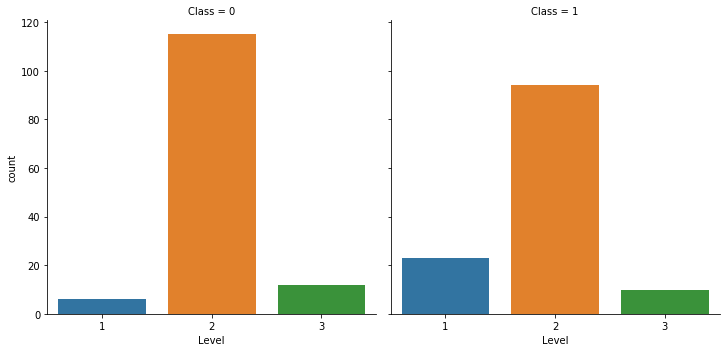

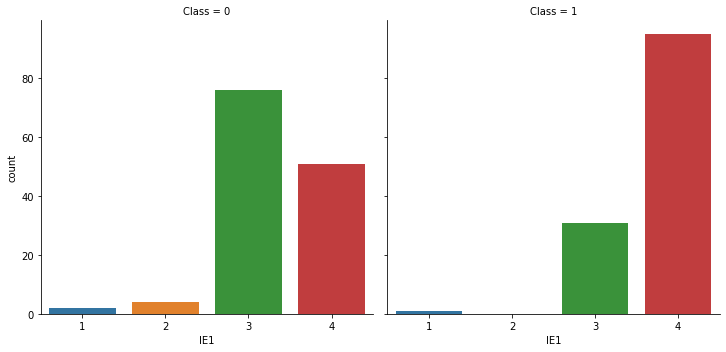

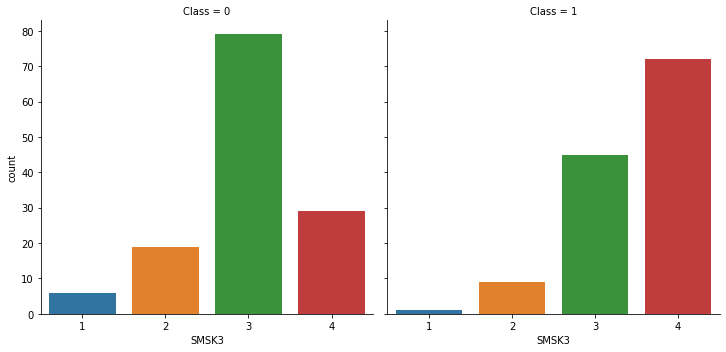

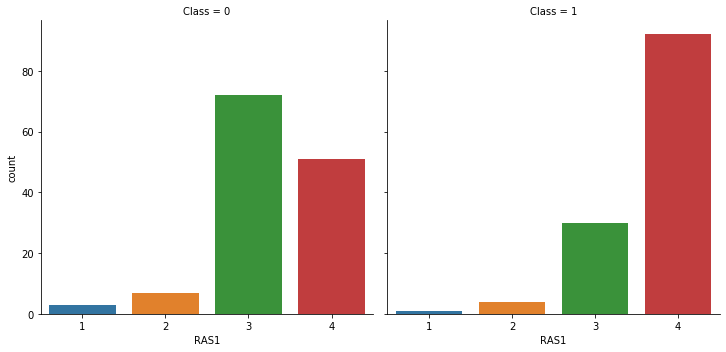

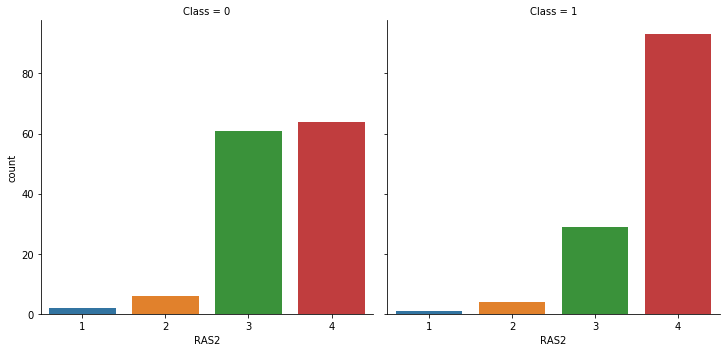

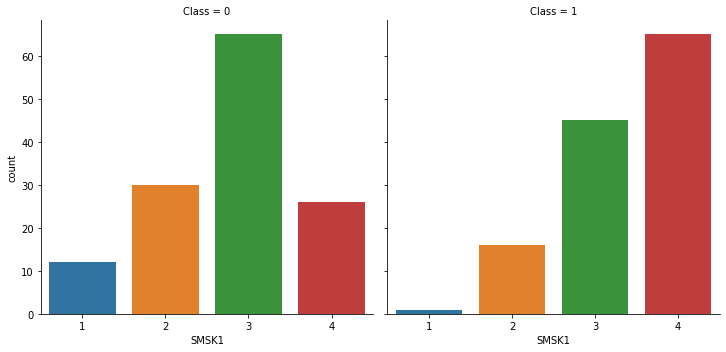

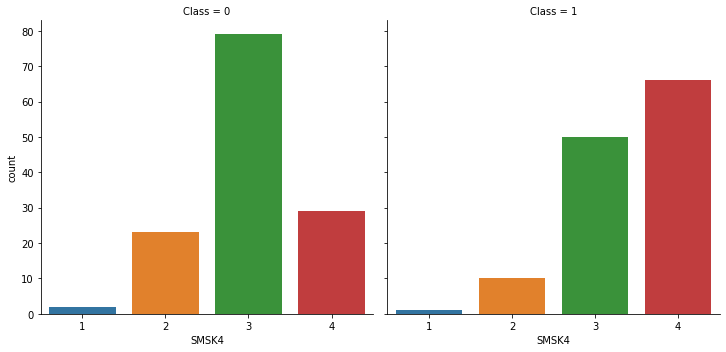

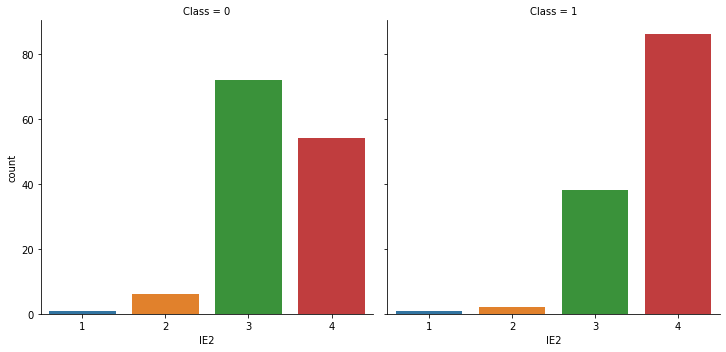

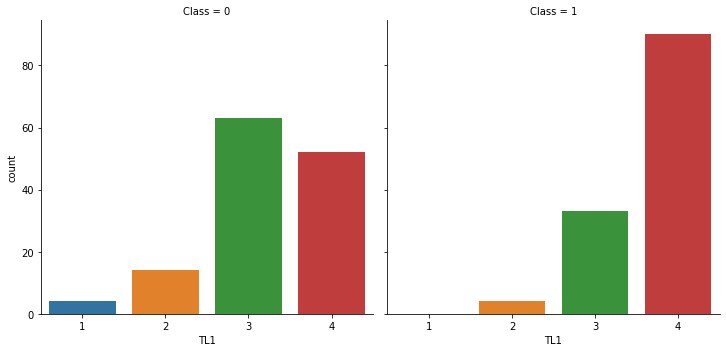

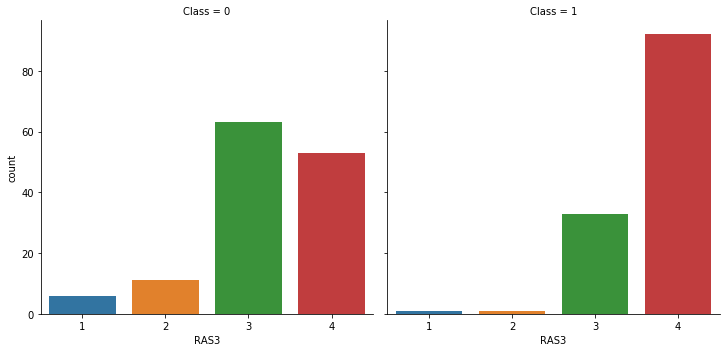

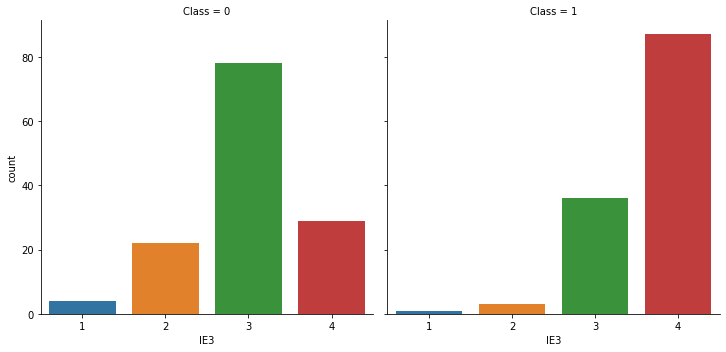

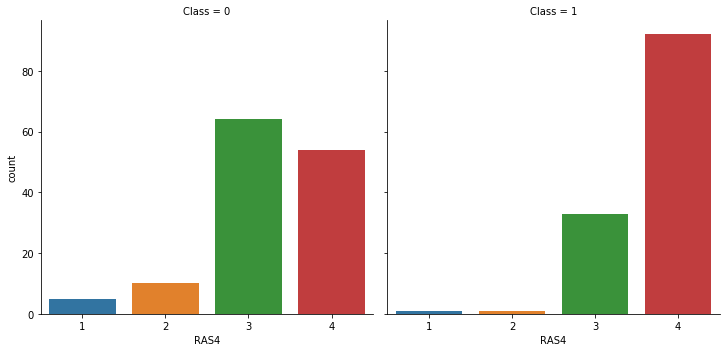

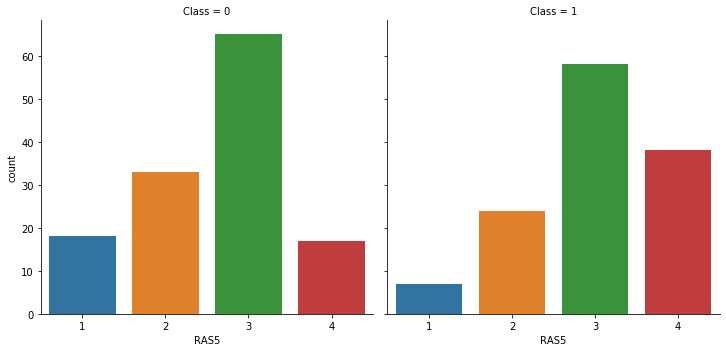

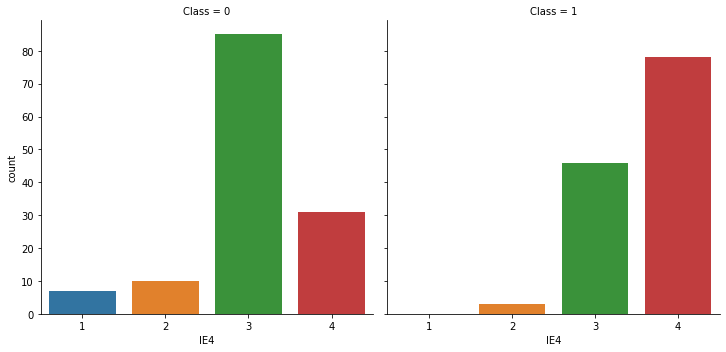

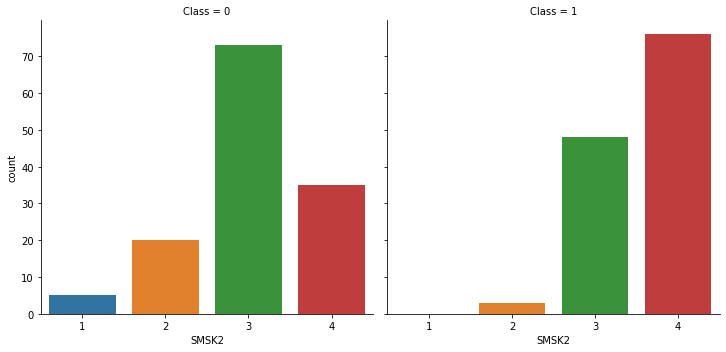

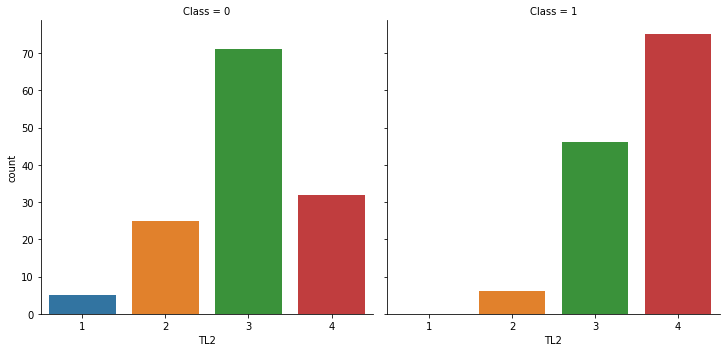

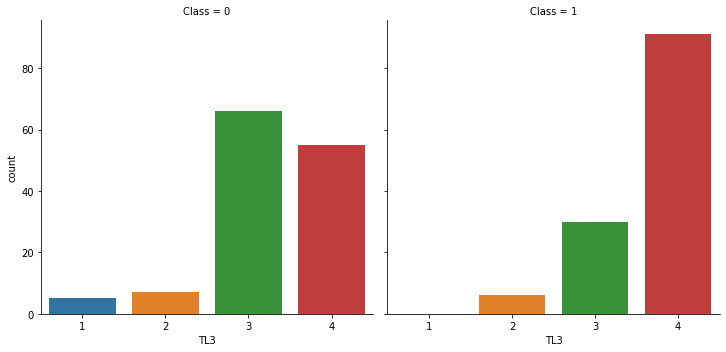

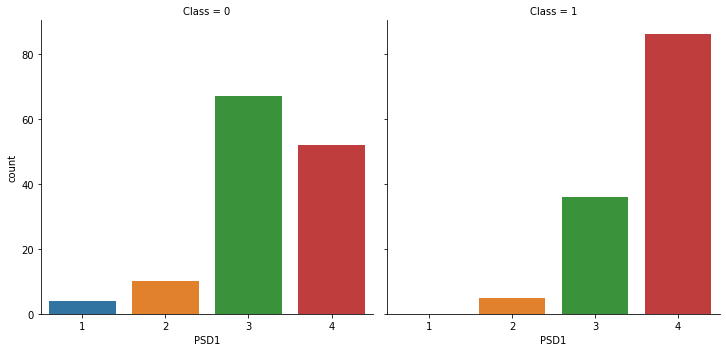

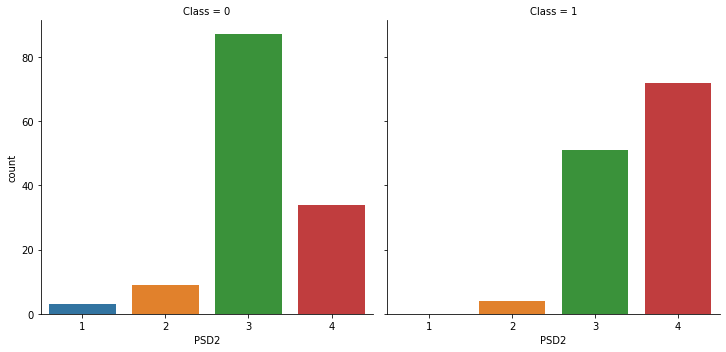

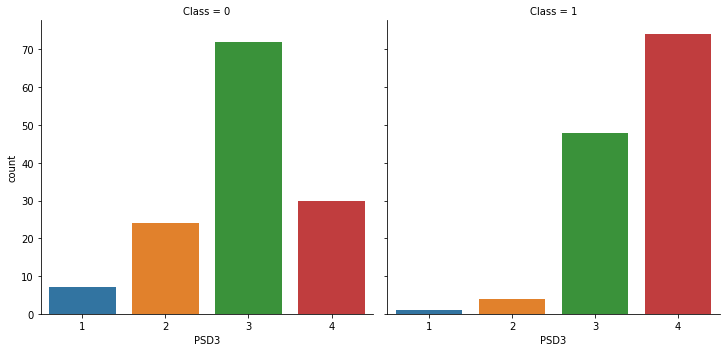

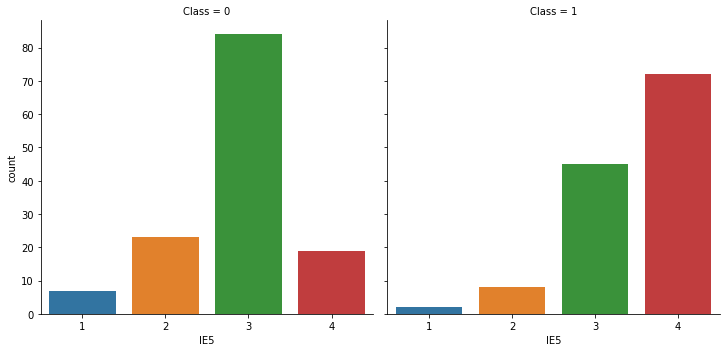

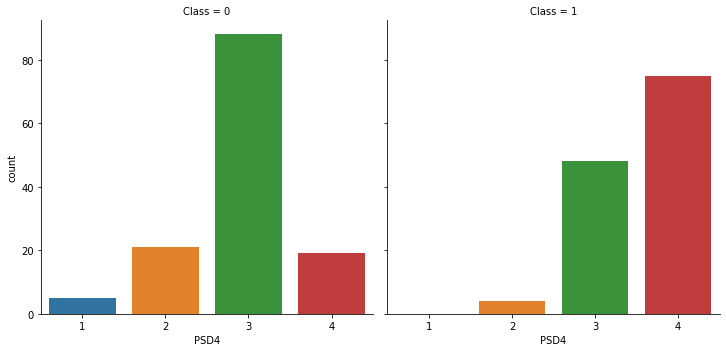

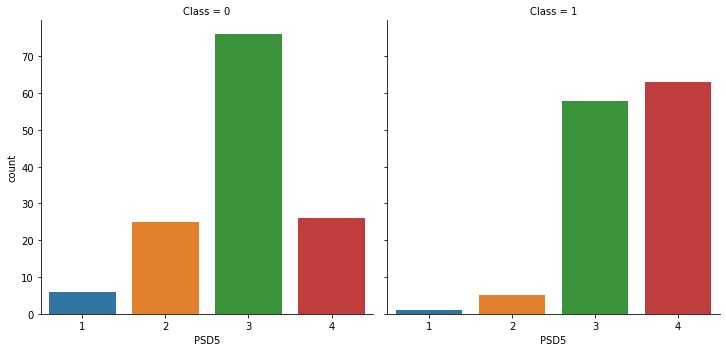

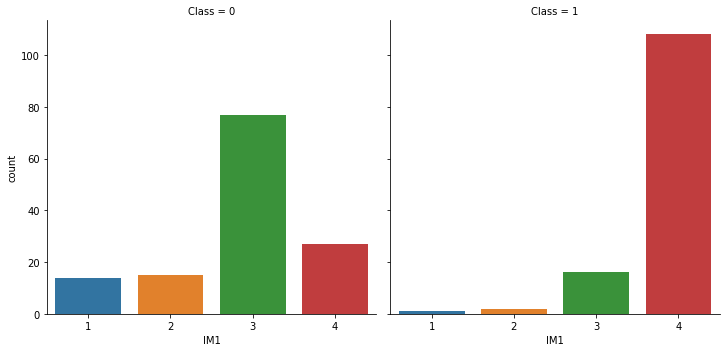

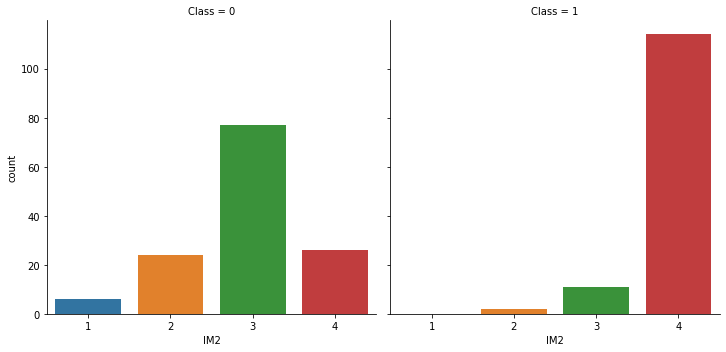

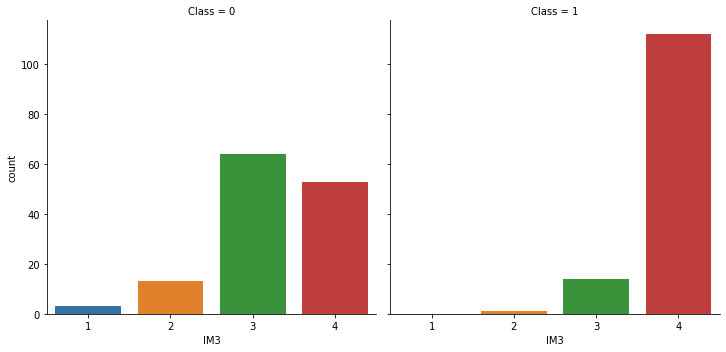

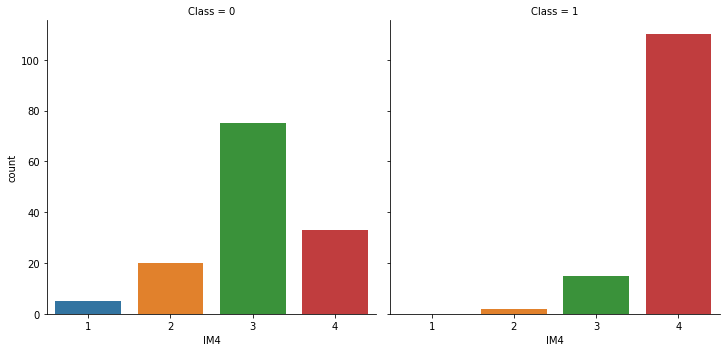

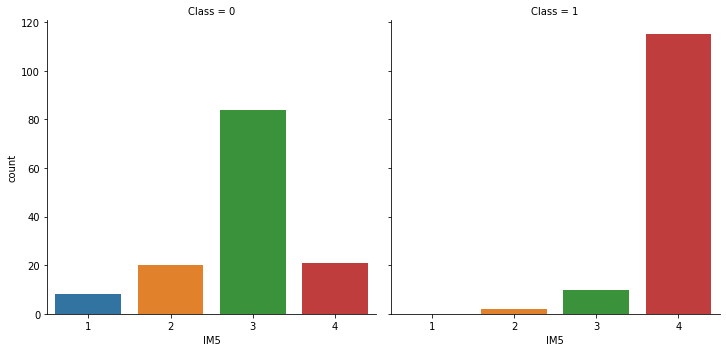

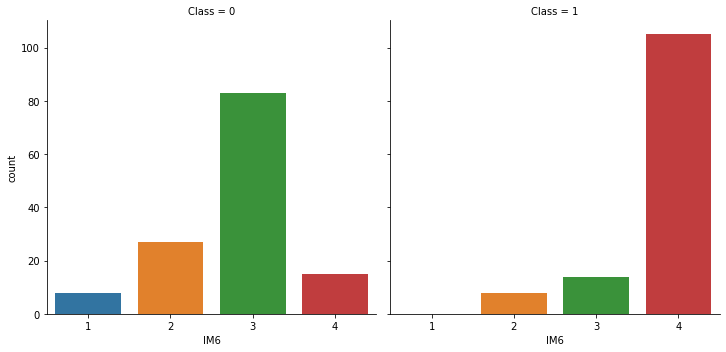

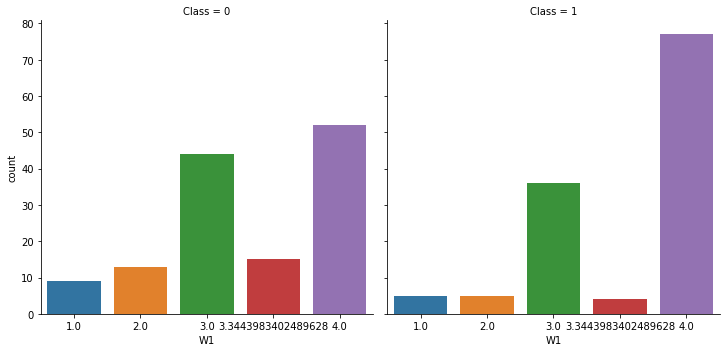

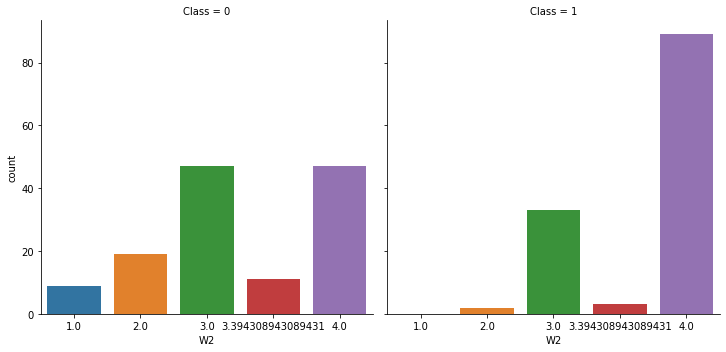

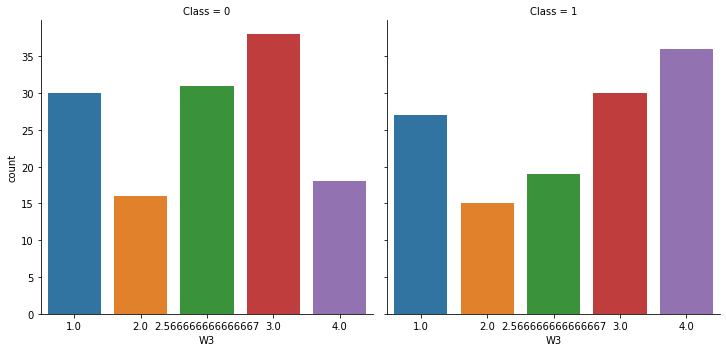

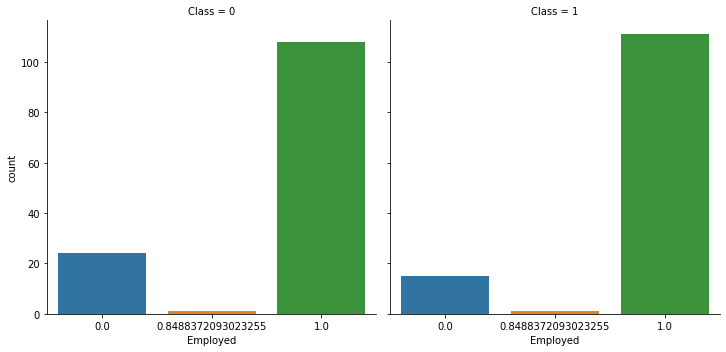

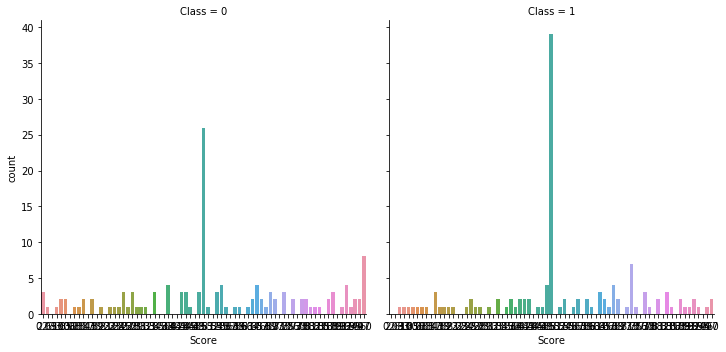

In [57]:
for i in df.columns[1:-1]:
    sns.catplot( x= i , col='Class',data=df , kind="count")

In [83]:
## Density
#sns.pairplot(df, diag_kind="kde")
 
## Histogram
#sns.pairplot(df, diag_kind="hist")
#sns.pairplot(df, diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False) )


In [84]:
## left
#sns.pairplot(df, kind="scatter", hue="species")
#plt.show()
 
# right
#sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
#plt.show()


In [58]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
df1 = sc.fit_transform(df.drop(columns = ['ID','Class']))

# pca dimension reduction

In [59]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['Class'], test_size=0.2)

In [61]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [62]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
pca.

# classification

# xgboost Classifier

In [63]:
from xgboost import XGBClassifier
import time
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 92.31
Time consumed for training: 1.924
Time consumed for prediction: 0.00306 seconds


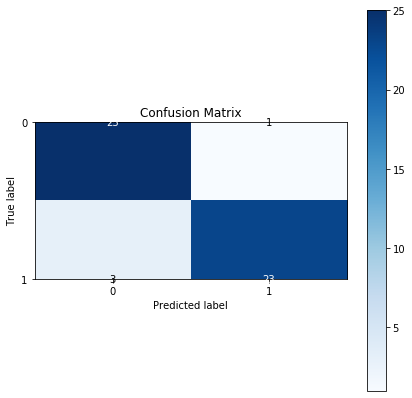

In [66]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test , preds , figsize=(7,7))

In [78]:
#f1 scor = accu   in case of binary classification
from sklearn.metrics import f1_score
f1_score(y_test,preds,average='macro')


0.8268590455049944

# RandomForest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 82.69
Time consumed for training: 0.355 seconds
Time consumed for prediction: 0.00128 seconds


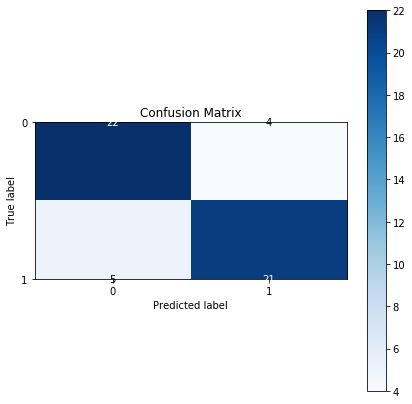

In [68]:
skplt.metrics.plot_confusion_matrix(y_test , preds , figsize=(7,7))

In [27]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((208, 27, 1), (52, 27, 1))

# nlp classifier training

In [28]:
dropout_perc = 0.2
l2_reg = 0.01

model = Sequential()
model.add(Dropout(dropout_perc, input_shape=(X_train.shape[1], 1)))
model.add(GRU(100, return_sequences=True))
model.add(Dropout(dropout_perc))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(dropout_perc))
model.add(GRU(100))
model.add(Dropout(dropout_perc))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(dropout_perc))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(l2_reg)))
model.compile(loss='mse', optimizer='adam' ,)
#Sequential GRU model END

In [29]:
trained_model = model.fit(X_train, y_train, epochs=100, batch_size=72, validation_split = 0.2, verbose=2, shuffle=False)

Train on 166 samples, validate on 42 samples
Epoch 1/100
 - 2s - loss: 0.2739 - val_loss: 0.2807
Epoch 2/100
 - 0s - loss: 0.2805 - val_loss: 0.2759
Epoch 3/100
 - 0s - loss: 0.2744 - val_loss: 0.2720
Epoch 4/100
 - 0s - loss: 0.2735 - val_loss: 0.2690
Epoch 5/100
 - 0s - loss: 0.2853 - val_loss: 0.2670
Epoch 6/100
 - 0s - loss: 0.2847 - val_loss: 0.2659
Epoch 7/100
 - 0s - loss: 0.2822 - val_loss: 0.2651
Epoch 8/100
 - 0s - loss: 0.2865 - val_loss: 0.2626
Epoch 9/100
 - 0s - loss: 0.2694 - val_loss: 0.2541
Epoch 10/100
 - 0s - loss: 0.2773 - val_loss: 0.2380
Epoch 11/100
 - 0s - loss: 0.2646 - val_loss: 0.2313
Epoch 12/100
 - 0s - loss: 0.2680 - val_loss: 0.2393
Epoch 13/100
 - 0s - loss: 0.2479 - val_loss: 0.2438
Epoch 14/100
 - 0s - loss: 0.2575 - val_loss: 0.2390
Epoch 15/100
 - 0s - loss: 0.2419 - val_loss: 0.2294
Epoch 16/100
 - 0s - loss: 0.2504 - val_loss: 0.2386
Epoch 17/100
 - 0s - loss: 0.2700 - val_loss: 0.2722
Epoch 18/100
 - 0s - loss: 0.2425 - val_loss: 0.2490
Epoch 19/1

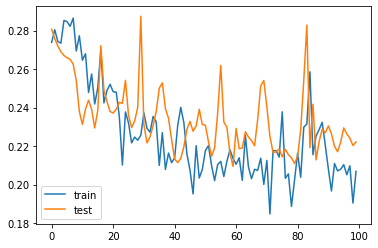

In [30]:
from matplotlib import pyplot
#Plotting the training and the validation
pyplot.plot(trained_model.history['loss'], label='train')
pyplot.plot(trained_model.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [32]:
#Making prediction on test data
y_pred = model.predict(X_test)
y_predicted = [1.0 if y > 0.5 else 0.0 for y in y_pred]


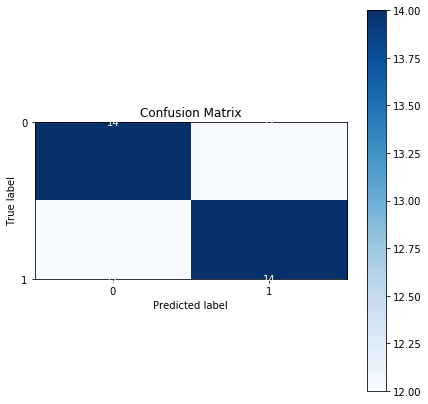

In [69]:
skplt.metrics.plot_confusion_matrix(y_test , y_predicted , figsize=(7,7))